# Boston Housing Dataset Project

#### A Multiple Linear Regression project used to predict the price (target) of a house based off some features

Import the necessary libraries

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline

Importing the dataset

In [95]:
from sklearn.datasets import load_boston

In [96]:
boston = load_boston()

In [97]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Let us check the features in these dataset and actually see what we are using to predict the price,
We can see we are using some housing data like tax, house age, zone and others

In [98]:
features  = boston["feature_names"]
print(features)
print(f"There are {len(features)} features")

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
There are 13 features


Now lets check the values of our features, and we can see that there is 13 values in an array, each representing the features above respectively

In [99]:
X = boston["data"]
# Fetch 2 datasets for readability
X[:2]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

Let's also check the target (price) values, we can see it is one value as it is only price (1 value) we are predicting

In [100]:
y = boston["target"]
y[:20]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2])

Okay now that we have our features and target, lets split them into training and testing data

In [101]:
from sklearn.model_selection import train_test_split

We are training 70% of our data and testing 30% of it

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Let us actually compare them

In [103]:
X.shape, y.shape

((506, 13), (506,))

In [104]:
X_train.shape, y_train.shape

((404, 13), (404,))

In [105]:
X_test.shape, y_test.shape

((102, 13), (102,))

Now let's perform Linear Regression on the data by importing the necessary libraries

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
model = LinearRegression()

Let's train our data

In [108]:
model.fit(X_train, y_train)

LinearRegression()

Okay now that we have trained our data, let's get our Feature's coefficients and the Intercept

In [109]:
model.coef_

array([-1.10477885e-01,  3.82117933e-02,  5.08984150e-02,  2.46235372e+00,
       -1.81685980e+01,  4.06864224e+00,  1.26432824e-02, -1.34228912e+00,
        2.80667168e-01, -1.22644597e-02, -9.75386013e-01,  7.72679749e-03,
       -5.47244927e-01])

In [110]:
model.intercept_

34.9090269820114

Let compare each coefficient to its feature

In [111]:
coefficents = pd.DataFrame(model.coef_, features, columns =["Coefficients"])
coefficents

,Coefficients
CRIM,-0.110478
ZN,0.038212
INDUS,0.050898
CHAS,2.462354
NOX,-18.168598
RM,4.068642
AGE,0.012643
DIS,-1.342289
RAD,0.280667
TAX,-0.012264


Now we have gotten our coefficients and intercept, let's predict the values of our target's testing values using the test feature data

In [112]:
predictions= model.predict(X_test)

In [113]:
predictions

array([25.07950114, 42.81322935, 21.26213828, 21.67964066, 21.83398204,
       -0.6228297 , 22.92731961, 14.25186744, 13.78368597, 24.88669784,
       22.7043849 , 33.21601446, 15.99917529, 24.61334748, 23.76478381,
       22.51788382, 13.40278307,  6.39368561, 16.69948944, 23.31975511,
       28.9226548 ,  8.48854659, 22.59851118, 11.24517366, 30.59897911,
       34.54474416, 28.69783758, 41.50159796, 24.80802704, 24.87570702,
       22.36857269, 24.71426126, 33.81573299, 29.68940504, 26.13398649,
       27.07759699, 31.03466949,  4.46993746, 18.9450925 ,  5.09530333,
       20.41320255, 37.42886546, 34.61332642, 25.70904728, 21.00992305,
       22.29397717, 16.36870426, 14.59889411, 26.23126574, 10.00030928,
       36.03780184, 17.86351467, 23.2471776 , 33.54838435,  9.96779896,
       19.11114821, 18.42239327, 18.31267035, 34.8386856 , 22.17711801,
       21.57130202, 24.57112806, 19.33966304, 28.15256895, 41.10388988,
       16.46897747, 20.18489692, 34.61196168, 20.31081735, 19.97

In [114]:
y_test

array([24. , 50. , 21. , 16.1, 20.6, 13.8, 20.3, 13.6, 18.2, 23.1, 21. ,
       26.7, 23.1, 21.7, 21.9, 17. , 18.5, 10.4, 17.8, 21.2, 22.9,  7. ,
       25. ,  5.6, 30.8, 50. , 28.4, 50. , 24.8, 21.5, 24.7, 19.4, 37.3,
       24.3, 25. , 22.3, 27.9,  8.4, 12.5, 10.5, 21.1, 43.1, 31. , 26.5,
       20.5, 20.3, 20.1,  8.4, 23.3,  6.3, 33.3, 12.6, 24.4, 34.9, 23.7,
       16.4, 19.5, 19.8, 33.8, 22.2, 20.7, 29.6, 15.2, 23.9, 50. , 19.1,
       20.4, 34.6, 16.8, 18.4, 22.1, 21.7, 42.8, 13.1, 22.7, 20.4, 30.1,
       50. , 14.3, 19.6, 44. , 18.8, 22.6, 13.2, 27.1, 13.8, 29.4, 20.1,
       22.6, 14.5, 20.1, 23.1, 15.6, 22.8, 21.7, 23.1, 22.8, 20.1, 23.3,
       13.4, 27.5, 22.6])

Now we are going to compare the targets with our predictions

In [115]:
data = pd.DataFrame(columns=["Target", "Prediction"])
data["Target"] = y_test
data["Prediction"] = predictions

In [116]:
data

,Target,Prediction
0,24.0,25.079501
1,50.0,42.813229
2,21.0,21.262138
3,16.1,21.679641
4,20.6,21.833982
...,...,...
97,20.1,17.873313
98,23.3,21.570993
99,13.4,16.968615
100,27.5,13.425706


Okay then let's compare them using a scatterplot, as we can see the line is positively correlated and moving in an upward trend

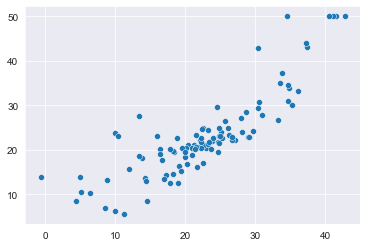

In [117]:
sns.scatterplot(y=y_test, x=predictions);

Also in the distribution of the residuals/errors, we see the data is almost evenly unifiormly distributed which means our model is somewhat good

In [118]:
residuals = y_test - predictions

<AxesSubplot:ylabel='Count'>

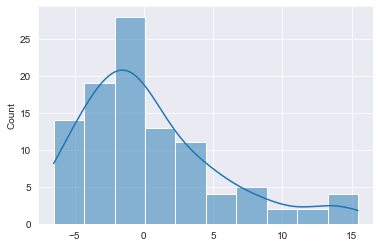

In [119]:
sns.histplot(residuals, kde=True)

### Lets check the Performance of our Model

In [120]:
from sklearn.metrics import r2_score, mean_squared_error

Below we see that our model is quite good, with the residuals quite close to 0 and a score of 80.3%, but if we keep re-running these the score may tend to increase or decrease, which is why your score may be different than 80.3%

In [121]:
print(f"Mean Squared Error : {mean_squared_error(y_test, predictions)}")
print(f"Root Mean Squared Error : {np.sqrt(mean_squared_error(y_test, predictions))}")
print(f"R2 Score : {r2_score(y_test, predictions)}")

Mean Squared Error : 25.356186029359602
Root Mean Squared Error : 5.035492630255713
R2 Score : 0.7135346727440108
